In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#############################################

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [3]:
import sklearn.datasets

In [4]:
ds = sklearn.datasets.fetch_california_housing()

In [5]:
print(ds.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
ds_x = pd.DataFrame(ds['data'])
ds_y = pd.Series(ds['target'])


ds_x.columns = ds['feature_names']

ds_x['val'] = 1

ds_y.name = ds['target_names'][0]

In [7]:
print(ds_x.shape)

ds_x.info()

(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   val         20640 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB


MedInc:
[0.4999, 0.536, 0.5495, 0.6433, 0.6775, 0.6825, 0.6831, 0.696, 0.6991, 0.7007] [13.8556, 13.947, 14.2867, 14.2959, 14.4113, 14.4219, 14.5833, 14.9009, 15.0, 15.0001]


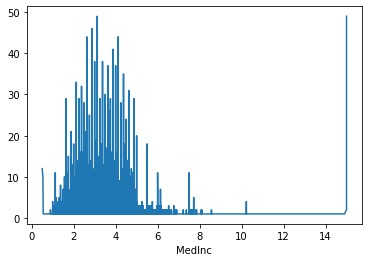

HouseAge:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] [43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]


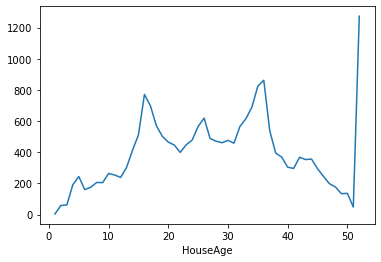

AveRooms:
[0.8461538461538461, 0.8888888888888888, 1.0, 1.1304347826086956, 1.2608695652173914, 1.3784860557768925, 1.4112903225806452, 1.4657534246575343, 1.550408719346049, 1.553030303030303] [47.515151515151516, 50.83783783783784, 52.69047619047619, 52.848214285714285, 56.26923076923077, 59.875, 61.8125, 62.422222222222224, 132.53333333333333, 141.9090909090909]


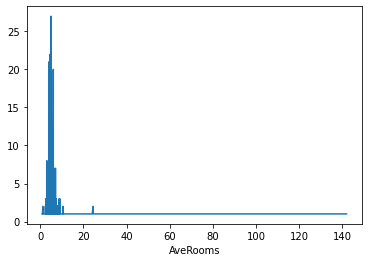

AveBedrms:
[0.3333333333333333, 0.375, 0.4444444444444444, 0.5, 0.5263157894736842, 0.53125, 0.5454545454545454, 0.5555555555555556, 0.5625, 0.5714285714285714] [9.703703703703704, 10.153846153846153, 10.27027027027027, 11.0, 11.181818181818182, 11.410714285714286, 14.11111111111111, 15.3125, 25.636363636363637, 34.06666666666667]


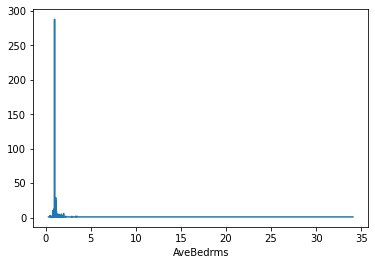

Population:
[3.0, 5.0, 6.0, 8.0, 9.0, 11.0, 13.0, 14.0, 15.0, 17.0] [12203.0, 12427.0, 12873.0, 13251.0, 15037.0, 15507.0, 16122.0, 16305.0, 28566.0, 35682.0]


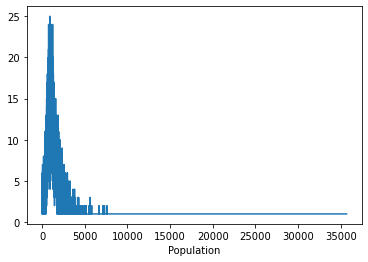

AveOccup:
[0.6923076923076923, 0.75, 0.9705882352941176, 1.0606060606060606, 1.0661764705882353, 1.0892678034102308, 1.0892857142857142, 1.1612903225806452, 1.1693290734824282, 1.2158730158730158] [21.333333333333332, 33.95294117647059, 41.214285714285715, 51.4, 63.75, 83.17142857142858, 230.17241379310346, 502.46153846153845, 599.7142857142857, 1243.3333333333333]


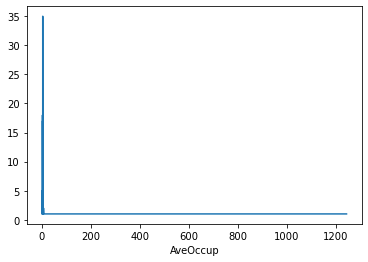

Latitude:
[32.54, 32.55, 32.56, 32.57, 32.58, 32.59, 32.6, 32.61, 32.62, 32.63] [41.78, 41.79, 41.8, 41.81, 41.82, 41.84, 41.86, 41.88, 41.92, 41.95]


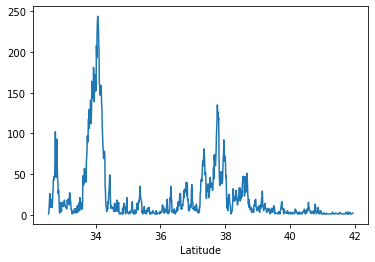

Longitude:
[-124.35, -124.3, -124.27, -124.26, -124.25, -124.23, -124.22, -124.21, -124.19, -124.18] [-114.61, -114.6, -114.59, -114.58, -114.57, -114.56, -114.55, -114.49, -114.47, -114.31]


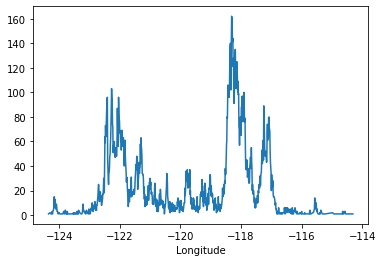

In [8]:
for i in ds_x.columns[:-1]:
    print(f'{i}:')
    lst = sorted(ds_x[i].unique())
    
    print(lst[:10], lst[-10:])
    ds_x.groupby(i).val.sum().plot();
    plt.show()
    #.sort_values(by='val', ascending=False)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    ds_x[ds_x.columns[:-1]], 
    ds_y, 
    test_size=0.2, 
    random_state=13
)

In [10]:
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_modl = model.predict(x_train)

y_test_pred = pd.DataFrame(zip(y_pred, y_test))

y_test_pred.columns=['y_pred','y_test']

y_test_pred

,y_pred,y_test
0,1.824527,1.30100
1,1.990376,2.29400
2,0.817754,0.82600
3,-0.189746,0.53100
4,1.764041,1.07800
...,...,...
4123,1.915092,2.22300
4124,2.174021,5.00001
4125,1.479862,1.42000
4126,1.000954,1.50900


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [12]:
RMSE = [
    mean_squared_error(y_test, y_pred),
    mean_squared_error(y_train, y_modl)
       ]
print(RMSE)

[0.5327327202373399, 0.5223032378234865]


In [13]:
R2 = [
    r2_score(y_test, y_pred),
    r2_score(y_train, y_modl)
]
R2

[0.6047072598918695, 0.606553667924014]

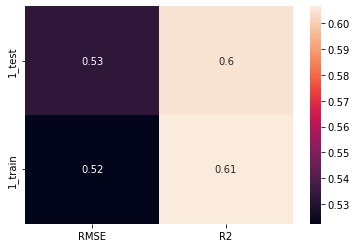

In [14]:
df_metrics = pd.DataFrame(RMSE, columns=['RMSE']).join(pd.DataFrame(R2, columns=['R2']))

df_metrics.index=['1_test','1_train']

sns.heatmap(df_metrics, 
            annot=True
           );

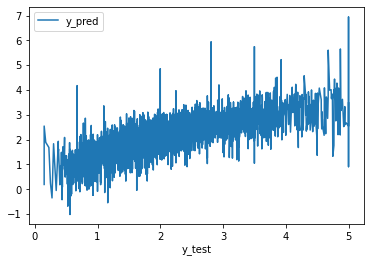

In [15]:
# Наблюдается небольшое количество выбросов
y_test_pred.sort_values(by='y_test').set_index('y_test').plot();

In [16]:
y_test_pred['val'] = 0
y_test_pred['val_1'] = -0.5
y_test_pred['val_2'] = 0.5
y_test_pred['val_11'] = -0.25
y_test_pred['val_21'] = 0.25
y_test_pred['y_err'] = ( y_test_pred['y_pred'] - y_test_pred['y_test'] ) #/ y_test_pred['y_test']
y_test_pred['y_err_p'] = ( 
    y_test_pred['y_pred'] - y_test_pred['y_test'] 
) / (
    y_test_pred['y_test'].max() - y_test_pred['y_test'].min()
)

y_test_pred.head(3)

,y_pred,y_test,val,val_1,val_2,val_11,val_21,y_err,y_err_p
0,1.824527,1.301,0,-0.5,0.5,-0.25,0.25,0.523527,0.107943
1,1.990376,2.294,0,-0.5,0.5,-0.25,0.25,-0.303624,-0.062603
2,0.817754,0.826,0,-0.5,0.5,-0.25,0.25,-0.008246,-0.001700


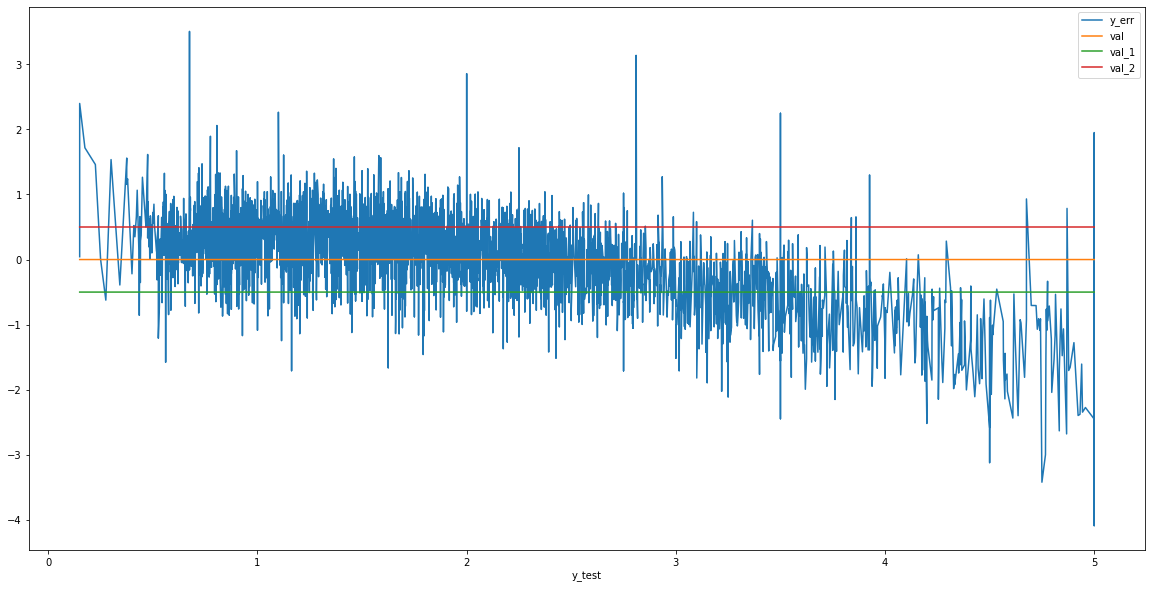

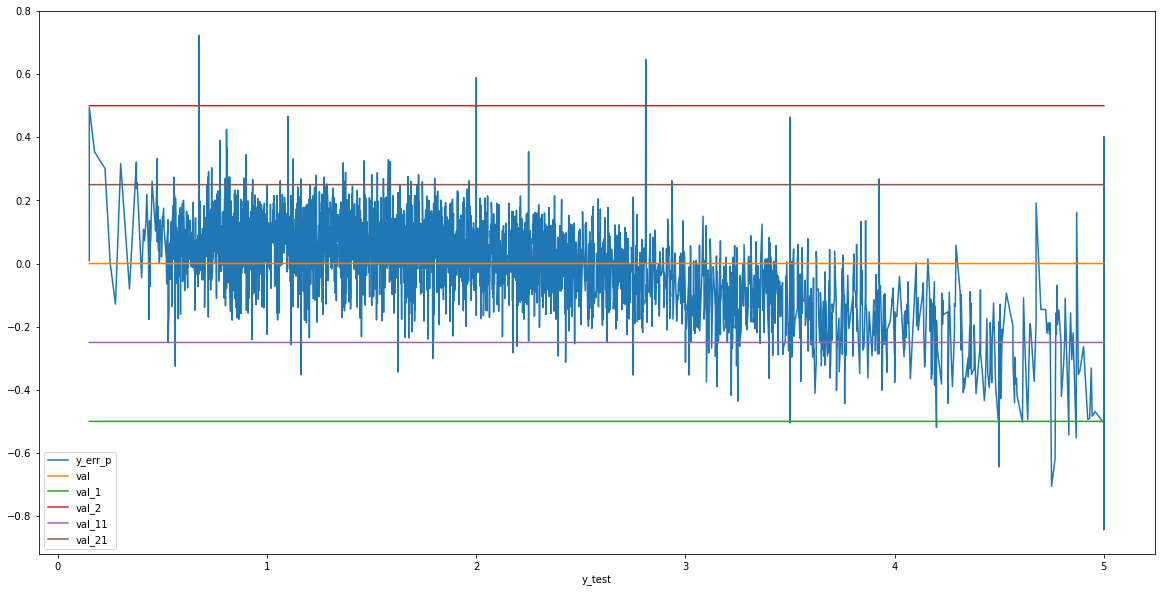

In [17]:
# При целевой переменной ниже 3х отклонения равномерные, 
# хотя и с выбросами и небольшим креном в положительную сторону (до 25%)
# При значении больше 3х отклонение смещается в отрицательную сторону,
# И доля отклонения по отношению к вариации растёт (до 50%)
y_test_pred[
    ['y_test','y_err'
     ,'val', 'val_1','val_2']
].sort_values(
    by='y_test'
).set_index(
    'y_test'
).plot(figsize=(20,10));

y_test_pred[
    ['y_test','y_err_p'
     ,'val', 'val_1','val_2'
     , 'val_11','val_21']
].sort_values(
    by='y_test'
).set_index(
    'y_test'
).plot(figsize=(20,10));

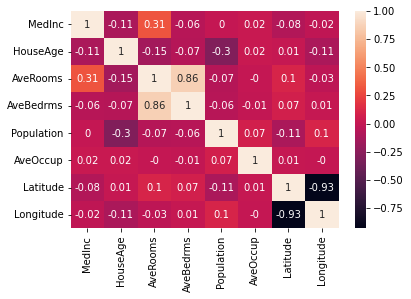

In [18]:
# Есть 2 пары коррелирующих переменных:
# Координаты
# AveRooms и AveBedrms
sns.heatmap(round(
    x_train.corr(),
    2
), 
            annot=True
           );

In [19]:
# AveOccup, Population, AveBedrms и Longitude - слабо коррелируют с целевой переменной
x_train.join(y_train).corr()[['MedHouseVal']].sort_values(by='MedHouseVal', ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.686658
AveRooms,0.146841
HouseAge,0.113570
AveOccup,-0.021834
Population,-0.029973
Longitude,-0.040131
AveBedrms,-0.040952
Latitude,-0.149890


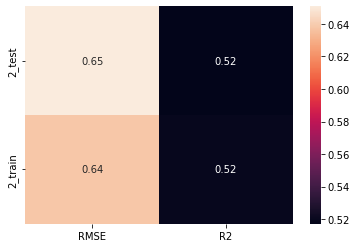

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    ds_x[['MedInc', 'HouseAge', 'AveRooms','Latitude']], 
    ds_y, 
    test_size=0.2, 
    random_state=13
)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_modl = model.predict(x_train)

y_test_pred = pd.DataFrame(zip(y_pred, y_test))

y_test_pred.columns=['y_pred','y_test']

y_test_pred

RMSE_1 = [
    mean_squared_error(y_test, y_pred),
    mean_squared_error(y_train, y_modl)
       ]

R2_1 = [
    r2_score(y_test, y_pred),
    r2_score(y_train, y_modl)
]

df_metrics_1 = pd.DataFrame(RMSE_1, columns=['RMSE']).join(pd.DataFrame(R2_1, columns=['R2']))

df_metrics_1.index=['2_test','2_train']

sns.heatmap(df_metrics_1, 
            annot=True
           );

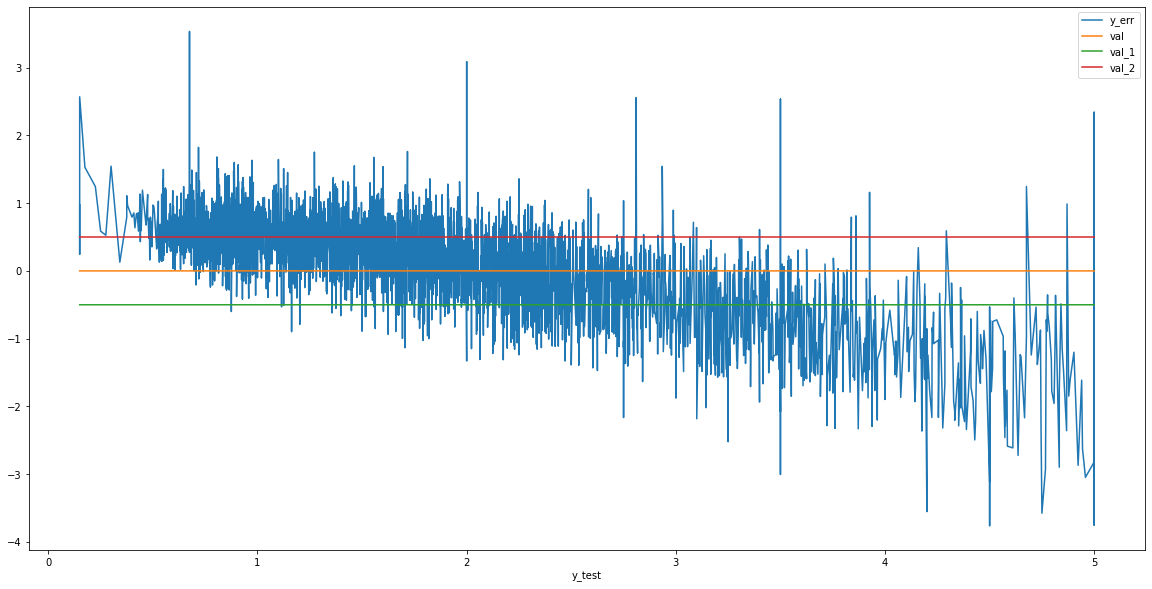

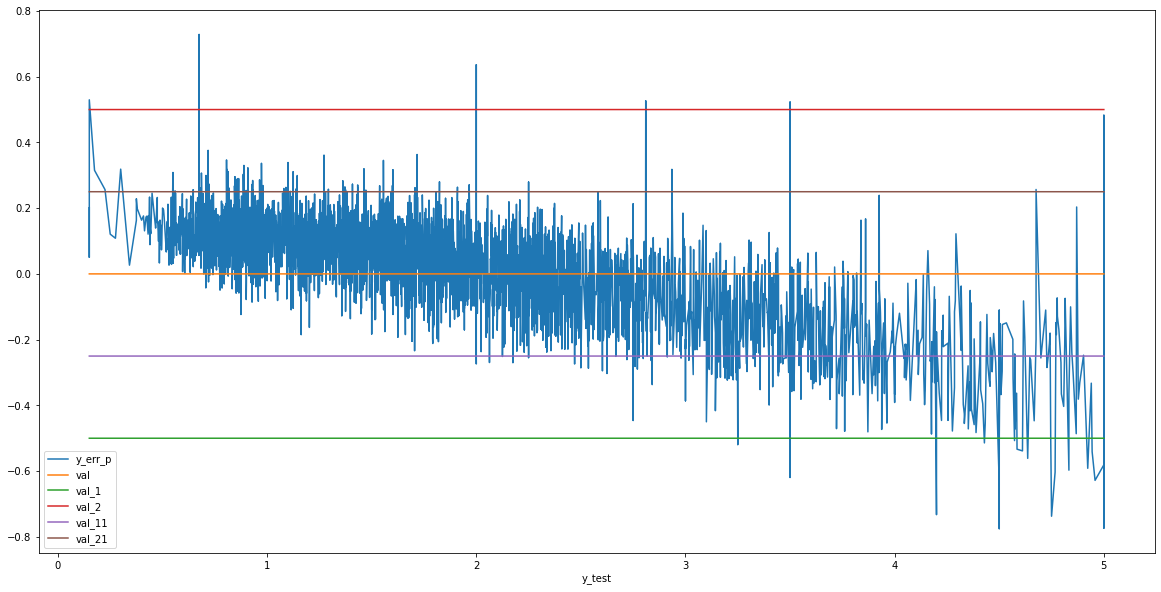

In [21]:
y_test_pred['val'] = 0
y_test_pred['val_1'] = -0.5
y_test_pred['val_2'] = 0.5
y_test_pred['val_11'] = -0.25
y_test_pred['val_21'] = 0.25
y_test_pred['y_err'] = ( y_test_pred['y_pred'] - y_test_pred['y_test'] ) #/ y_test_pred['y_test']
y_test_pred['y_err_p'] = ( 
    y_test_pred['y_pred'] - y_test_pred['y_test'] 
) / (
    y_test_pred['y_test'].max() - y_test_pred['y_test'].min()
)

y_test_pred[
    ['y_test','y_err'
     ,'val', 'val_1','val_2']
].sort_values(
    by='y_test'
).set_index(
    'y_test'
).plot(figsize=(20,10));

y_test_pred[
    ['y_test','y_err_p'
     ,'val', 'val_1','val_2'
     , 'val_11','val_21']
].sort_values(
    by='y_test'
).set_index(
    'y_test'
).plot(figsize=(20,10));

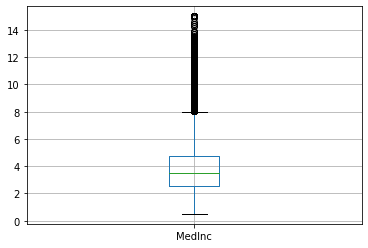

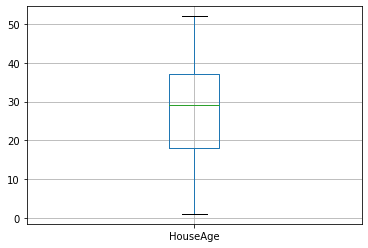

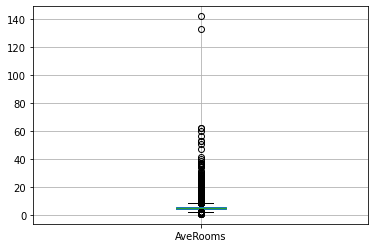

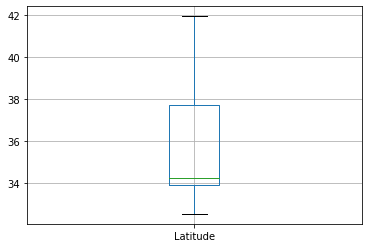

In [22]:
# Выбросы для MedInc - больше 8
for col in ['MedInc', 'HouseAge', 'AveRooms','Latitude']:
    ds_x[[col]].boxplot();
    plt.show()

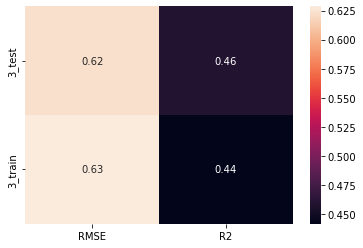

In [23]:
x_train, x_test, y_train, y_test = train_test_split(
    ds_x.join(ds_y).query('MedInc<=8')[['MedInc', 'HouseAge', 'AveRooms','Latitude']], 
    ds_x.join(ds_y).query('MedInc<=8')[['MedHouseVal']], 
    test_size=0.2, 
    random_state=13
)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_modl = model.predict(x_train)

y_test_pred = pd.DataFrame(zip(y_pred, y_test))

y_test_pred.columns=['y_pred','y_test']

y_test_pred

RMSE_2 = [
    mean_squared_error(y_test, y_pred),
    mean_squared_error(y_train, y_modl)
       ]

R2_2 = [
    r2_score(y_test, y_pred),
    r2_score(y_train, y_modl)
]

df_metrics_2 = pd.DataFrame(RMSE_2, columns=['RMSE']).join(pd.DataFrame(R2_2, columns=['R2']))

df_metrics_2.index=['3_test','3_train']

sns.heatmap(df_metrics_2, 
            annot=True
           );

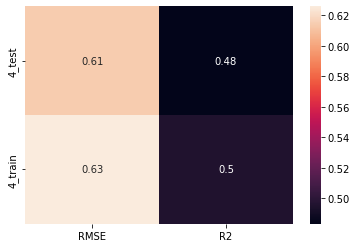

In [24]:
x_train, x_test, y_train, y_test = train_test_split(
    ds_x.join(ds_y).query('MedInc<=10')[['MedInc', 'HouseAge', 'AveRooms','Latitude']], 
    ds_x.join(ds_y).query('MedInc<=10')[['MedHouseVal']], 
    test_size=0.2, 
    random_state=13
)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_modl = model.predict(x_train)

y_test_pred = pd.DataFrame(zip(y_pred, y_test))

y_test_pred.columns=['y_pred','y_test']

y_test_pred

RMSE_3 = [
    mean_squared_error(y_test, y_pred),
    mean_squared_error(y_train, y_modl)
       ]

R2_3 = [
    r2_score(y_test, y_pred),
    r2_score(y_train, y_modl)
]

df_metrics_3 = pd.DataFrame(RMSE_3, columns=['RMSE']).join(pd.DataFrame(R2_3, columns=['R2']))

df_metrics_3.index=['4_test','4_train']

sns.heatmap(df_metrics_3, 
            annot=True
           );

MedInc


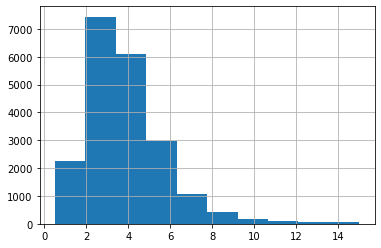

HouseAge


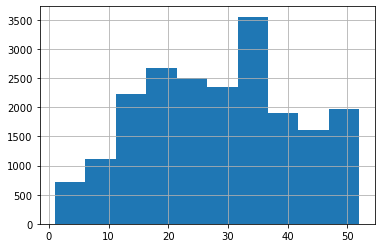

AveRooms


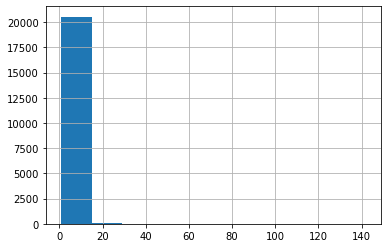

Latitude


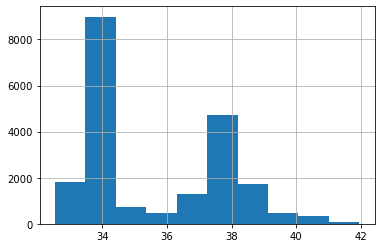

In [25]:
for col in ['MedInc', 'HouseAge', 'AveRooms','Latitude']:
    print(col)
    ds_x[col].hist();
    plt.show()

In [53]:
ds_x_1 = ds_x.iloc[:,:-1].copy()

ds_x_1['MedInc'] = np.log10(ds_x_1['MedInc'])

ds_x_1['HouseAge'] = ds_x_1['HouseAge'] ** 2 

ds_x_1['AveRooms'] = ( 
    ds_x_1['AveRooms'] - ds_x_1['AveRooms'].min() 
) / (
    ds_x_1['AveRooms'].std()
)

ds_x_1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.920395,1681.0,2.480818,1.023810,322.0,2.555556,37.88,-122.23
1,0.919151,441.0,2.179307,0.971880,2401.0,2.109842,37.86,-122.22
2,0.860781,2704.0,3.007866,1.073446,496.0,2.802260,37.85,-122.24
3,0.751518,2704.0,2.009236,1.073059,558.0,2.547945,37.85,-122.25
4,0.585032,2704.0,2.196976,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,0.193208,625.0,1.697254,1.133333,845.0,2.560606,39.48,-121.09
20636,0.407697,324.0,2.129148,1.315789,356.0,3.122807,39.49,-121.21
20637,0.230449,289.0,1.761958,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.271191,324.0,1.812064,1.171920,741.0,2.123209,39.43,-121.32


MedInc


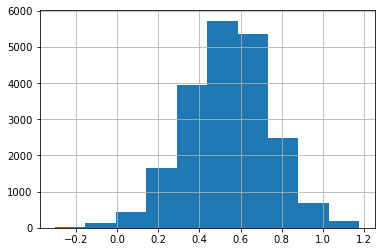

HouseAge


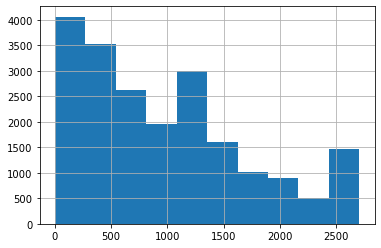

AveRooms


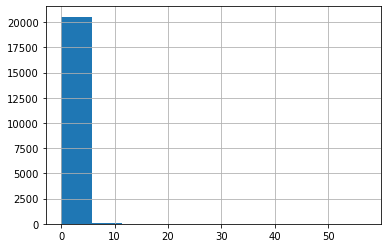

Latitude


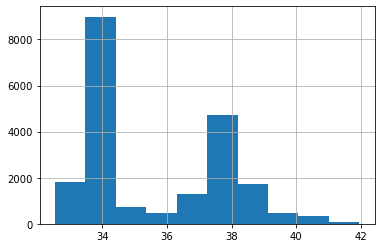

In [54]:
for col in ['MedInc', 'HouseAge', 'AveRooms','Latitude']:
    print(col)
    ds_x_1[col].hist();
    plt.show()

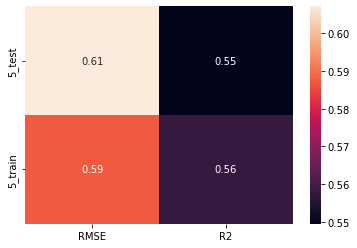

In [55]:
x_train, x_test, y_train, y_test = train_test_split(
    ds_x_1, 
    ds_y, 
    test_size=0.2, 
    random_state=13
)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_modl = model.predict(x_train)

y_test_pred = pd.DataFrame(zip(y_pred, y_test))

y_test_pred.columns=['y_pred','y_test']

y_test_pred

RMSE_4 = [
    mean_squared_error(y_test, y_pred),
    mean_squared_error(y_train, y_modl)
       ]

R2_4 = [
    r2_score(y_test, y_pred),
    r2_score(y_train, y_modl)
]

df_metrics_4 = pd.DataFrame(RMSE_4, columns=['RMSE']).join(pd.DataFrame(R2_4, columns=['R2']))

df_metrics_4.index=['5_test','5_train']

sns.heatmap(df_metrics_4, 
            annot=True
           );

In [63]:
steps = pd.DataFrame(['Просто модель',
                      'Удалены некоррелирующие с целевой и кореллирующие с другими столбцы',
                      'Удалены выбросы по MedInc > 8','Удалены выбросы по MedInc > 10',
                      """Из MedInc вычислен логарифм
                      HouseAge возведён в квадрат
                      AveRooms стандартизировано"""],
                    columns=['manipulations'])

In [71]:
ds_table = ds_final.reset_index()

ds_table['step'] = ds_table['index'].apply(lambda x: x.split('_')[0])

ds_table['type'] = ds_table['index'].apply(lambda x: x.split('_')[1])

ds_table_2 = ds_table.query('type == "test"')

ds_table_2.index = ['Просто модель','С удалением некоррелированных столбцов',
                    'С удалением выбросов_1','С удалением выбросов_2','С математическим преобразованием']

ds_table_2.reset_index().join(steps)[['level_0', 'step', 'RMSE', 'R2', 'manipulations']]

,level_0,step,RMSE,R2,manipulations
0,Просто модель,1,0.532733,0.604707,Просто модель
1,С удалением некоррелированных столбцов,2,0.650805,0.517097,Удалены некоррелирующие с целевой и кореллирую...
2,С удалением выбросов_1,3,0.622874,0.458782,Удалены выбросы по MedInc > 8
3,С удалением выбросов_2,4,0.613768,0.483232,Удалены выбросы по MedInc > 10
4,С математическим преобразованием,5,0.718451,0.466903,Из MedInc вычислен логарифм\n ...


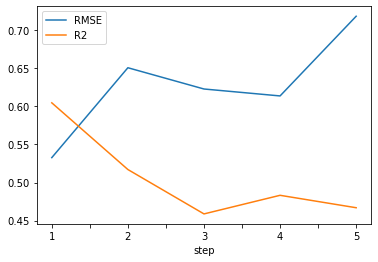

In [72]:
ds_table_2.set_index('step')[['RMSE','R2']].plot();

К сожалению, преобразования не дали эффекта - изначальный R2 60% снизился до 45%

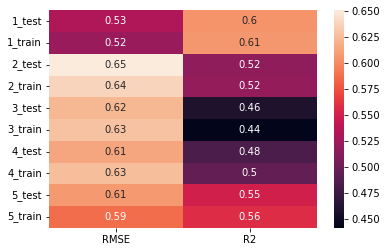

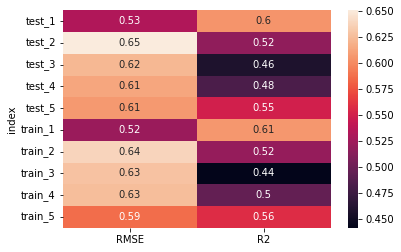

In [73]:
ds_final = df_metrics.append(df_metrics_1).append(df_metrics_2).append(df_metrics_3).append(df_metrics_4)

ds_final_2 = ds_final.reset_index()

ds_final_2['index'] = ds_final_2['index'].apply(lambda x: '_'.join(x.split('_')[::-1]))



sns.heatmap(ds_final , 
            annot=True
           );
plt.show()

sns.heatmap(ds_final_2.sort_values(by='index').set_index('index'), 
            annot=True
           );
plt.show()